In [1]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append('../../')
import wandb

from modules.train import train_and_log

In [2]:
device= 'cuda:1'
testing= False
project_name= "PhaseD2NN"
log_wandb = True

if testing and log_wandb:project_name='testing_to_delete'

epochs= 30
save_results_local= 10

In [ ]:
if log_wandb:wandb.login(key = os.environ.get('WANDB_API_KEY_FYP'))

d2nn_exp_mnist_corrected
No learnable transmission coefficients
Learnable transmission coefficient: Amplitude and Phase
Learnable transmission coefficient: Amplitude and Phase
Learnable transmission coefficient: Amplitude and Phase
Learnable transmission coefficient: Amplitude and Phase
Learnable transmission coefficient: Amplitude and Phase
Learnable transmission coefficient: Amplitude and Phase
Learnable transmission coefficient: Amplitude and Phase
Learnable transmission coefficient: Amplitude and Phase
exp results dir: ../results/d2nn_exp_mnist_corrected


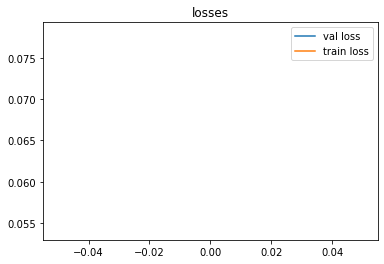

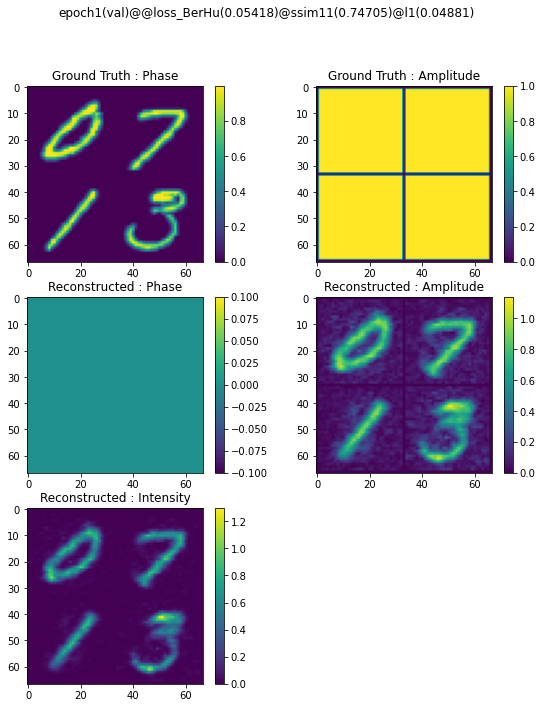

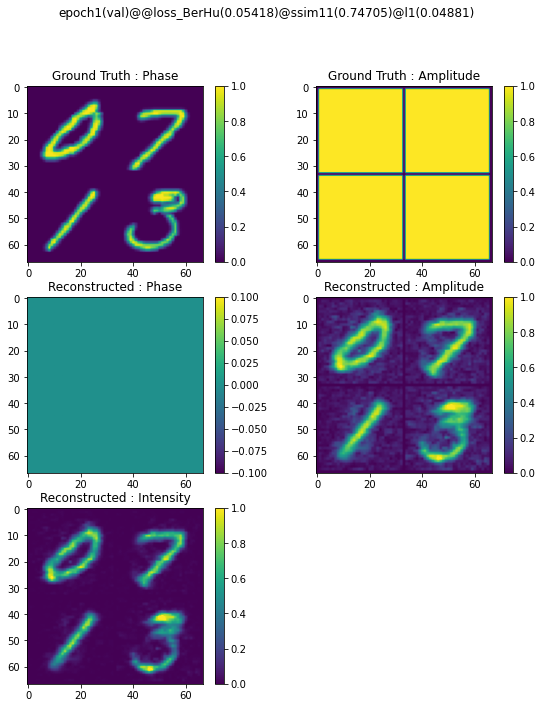

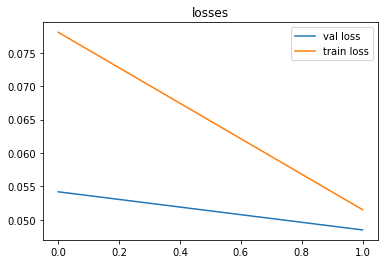

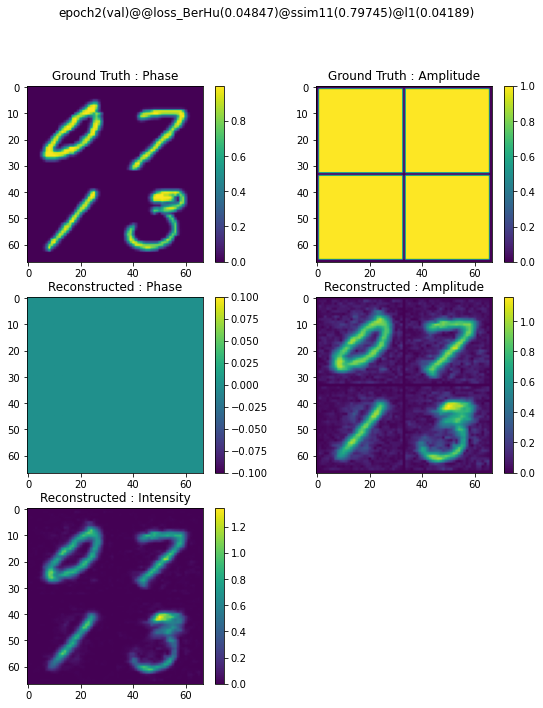

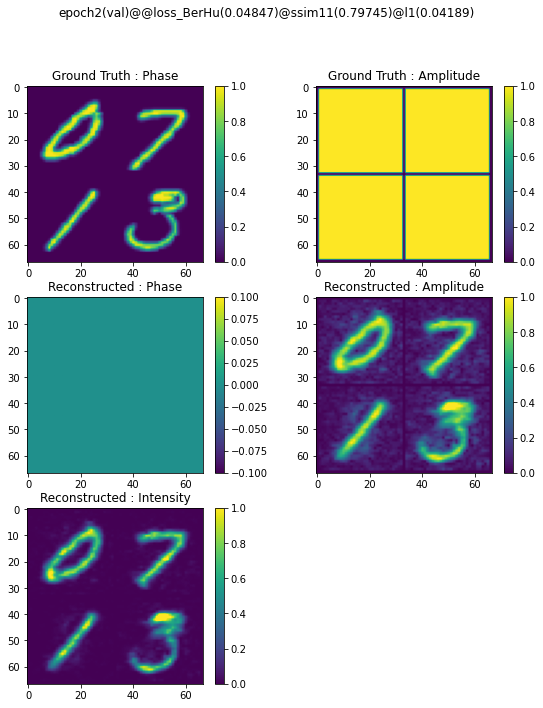

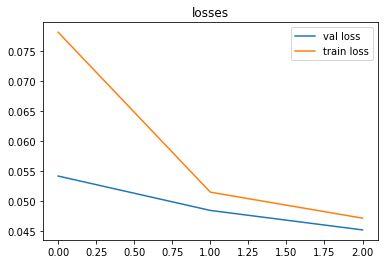

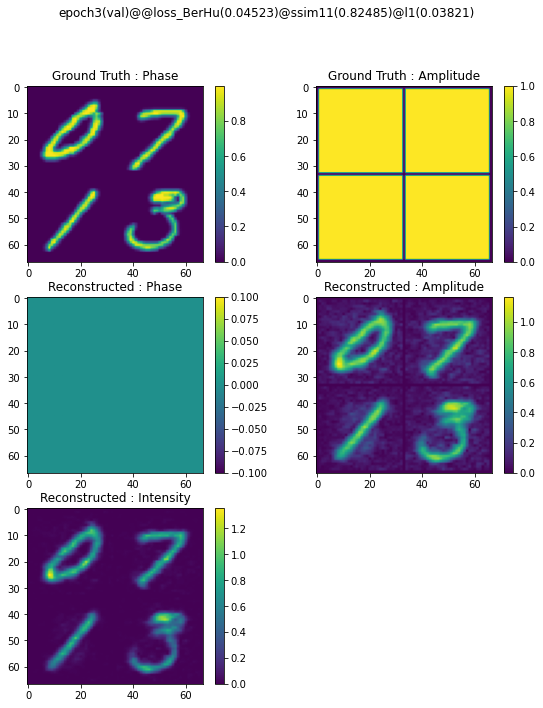

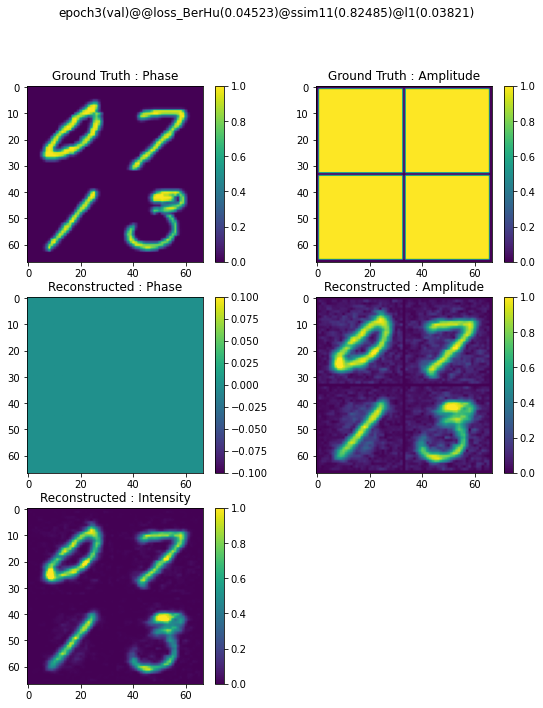

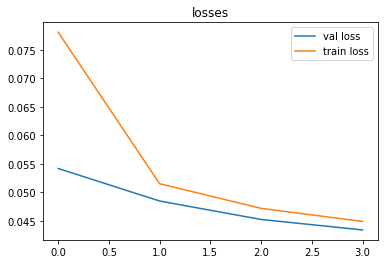

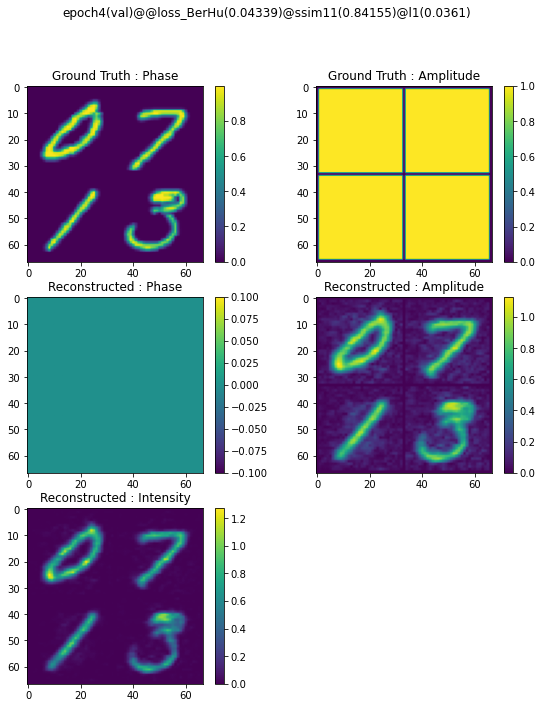

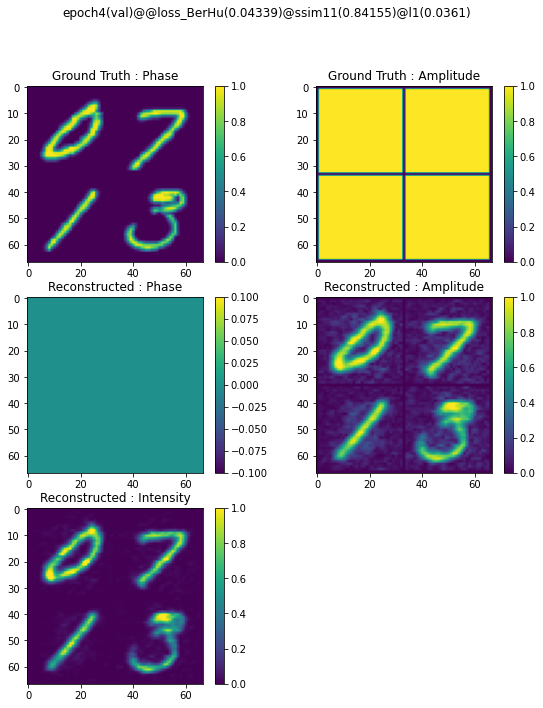

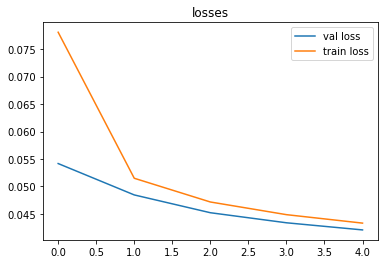

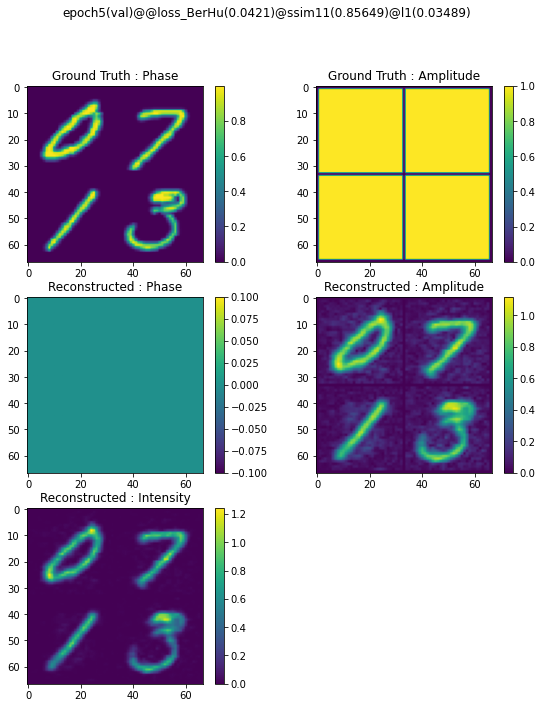

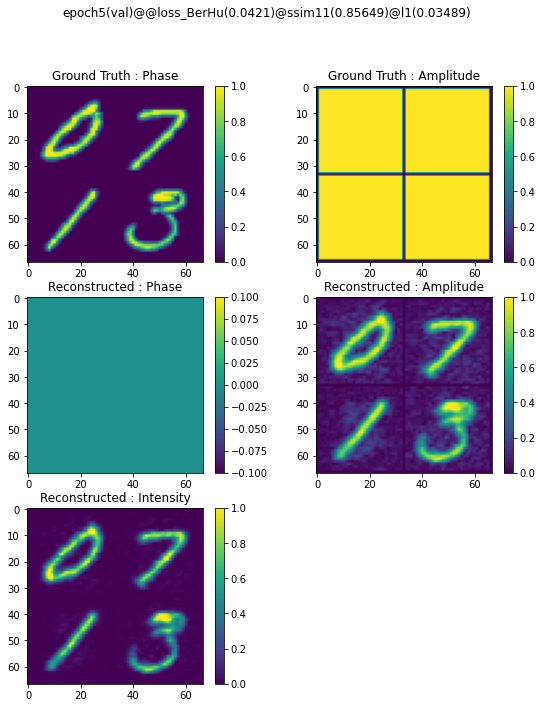

In [3]:
if testing:
    epochs= 1
    save_results_local= 1

configs = {
    'output_scale': 1.0,
    'output_scale_learnable': True,

    'device': 'cuda:0',
    'model': 'd2nnASwWindow', 
    
    "lambda_": 6.328e-07,
    "delta_z": 3.373e-06,
    "in_dist": 3.373e-06,
    "out_dist": 5.904e-06,
    "neuron_size": 3.164e-07,    
    
    'img_size': 128,
    'shrink_factor': 4,
    'n_layers': 8,
    'window_size':4,
    'save_results_local':save_results_local,

    'learning_rate': 0.01,
    'epochs': epochs,
    'loss_func': 'BerHu(\'mean\',0.98).to(device)',
    'train_batch_size': 32,
    'torch_seed': 10,
    'learn_type': 'phase', 
    'unwrapped_phase': True,

    'testing': testing,
    'log_wandb' : log_wandb,

    'task_type': 'phase2intensity',

    'get_dataloaders' : 'get_bacteria_dataloaders', #'get_qpm_np_dataloaders', 

    'angle_max': '2*np.pi', #'2*np.pi',
    'dataset_debug_opts': 'clip_phase',
}

configs['exp_name'] = f'd2nn_exp_bacteria_newBerhu@learn_type({configs['learn_type']})@output_scale_learnable({configs['output_scale_learnable']})'

print(configs['exp_name'])

if testing:
    configs['exp_name'] = 'testing'

if configs['log_wandb']:
    wandb.init(
        project='PhaseD2NN_reproduce', # Wandb project name
        name =configs['exp_name'], # meaningful experiment name
        tags = ['Hasindu'],
        config=configs,
    )
train_and_log(configs)

if configs['log_wandb']:wandb.finish()
